In [1]:
from atomai.utils import create_lattice_mask, extract_patches_
from atomai.transforms import datatransform
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = np.load('mos2_supercell.npz')
dataset.keys()

KeysView(NpzFile 'mos2_supercell.npz' with keys: image, label)

In [3]:
image = dataset['image']
label = dataset['label']
print(image.shape, label.shape)

(3840, 3326) (3840, 3326, 1)


In [4]:
images_all, labels_all = extract_patches_(
    image, label, patch_size=256, num_patches=2000, random_state=42)
print(images_all.shape, labels_all.shape)

(2000, 256, 256) (2000, 256, 256)


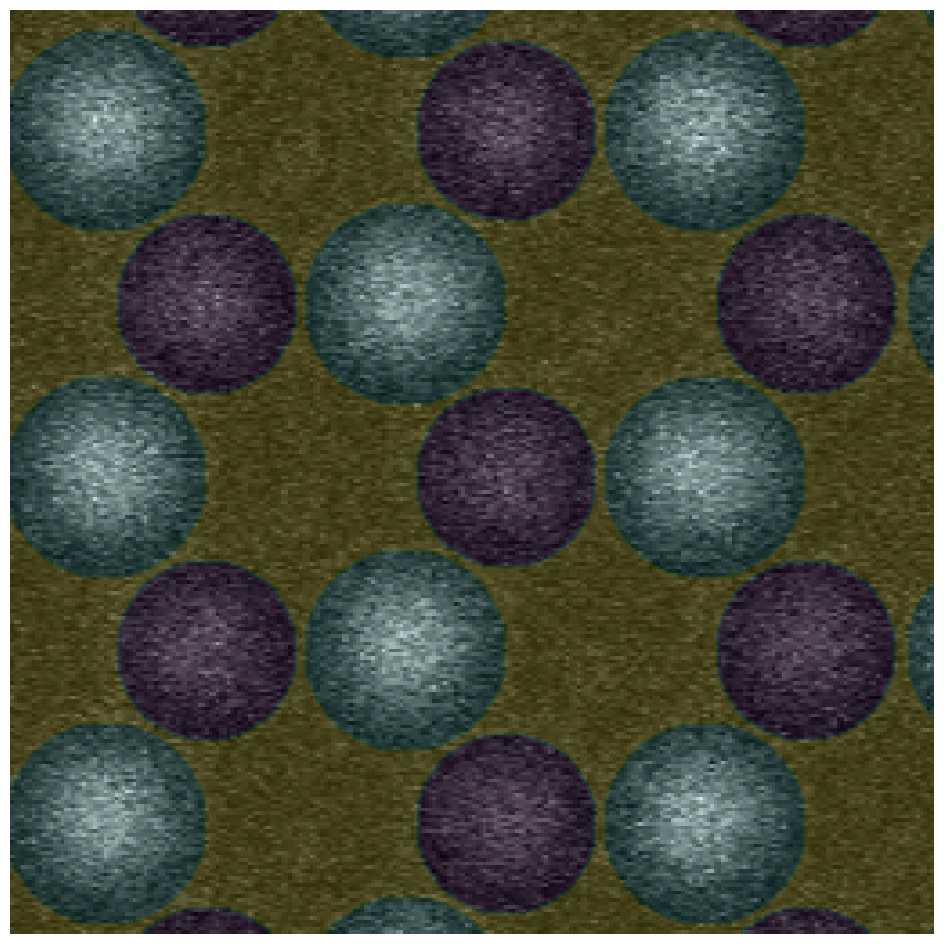

In [5]:
k = 42
plt.figure(figsize=(12, 12), dpi=100)
plt.axis('off')
plt.imshow(images_all[k], cmap='gray')
plt.imshow(labels_all[k], alpha=.2, interpolation='Gaussian')
plt.savefig('../images/pre_noise_img_label_mos2.png', dpi=900, bbox_inches='tight')

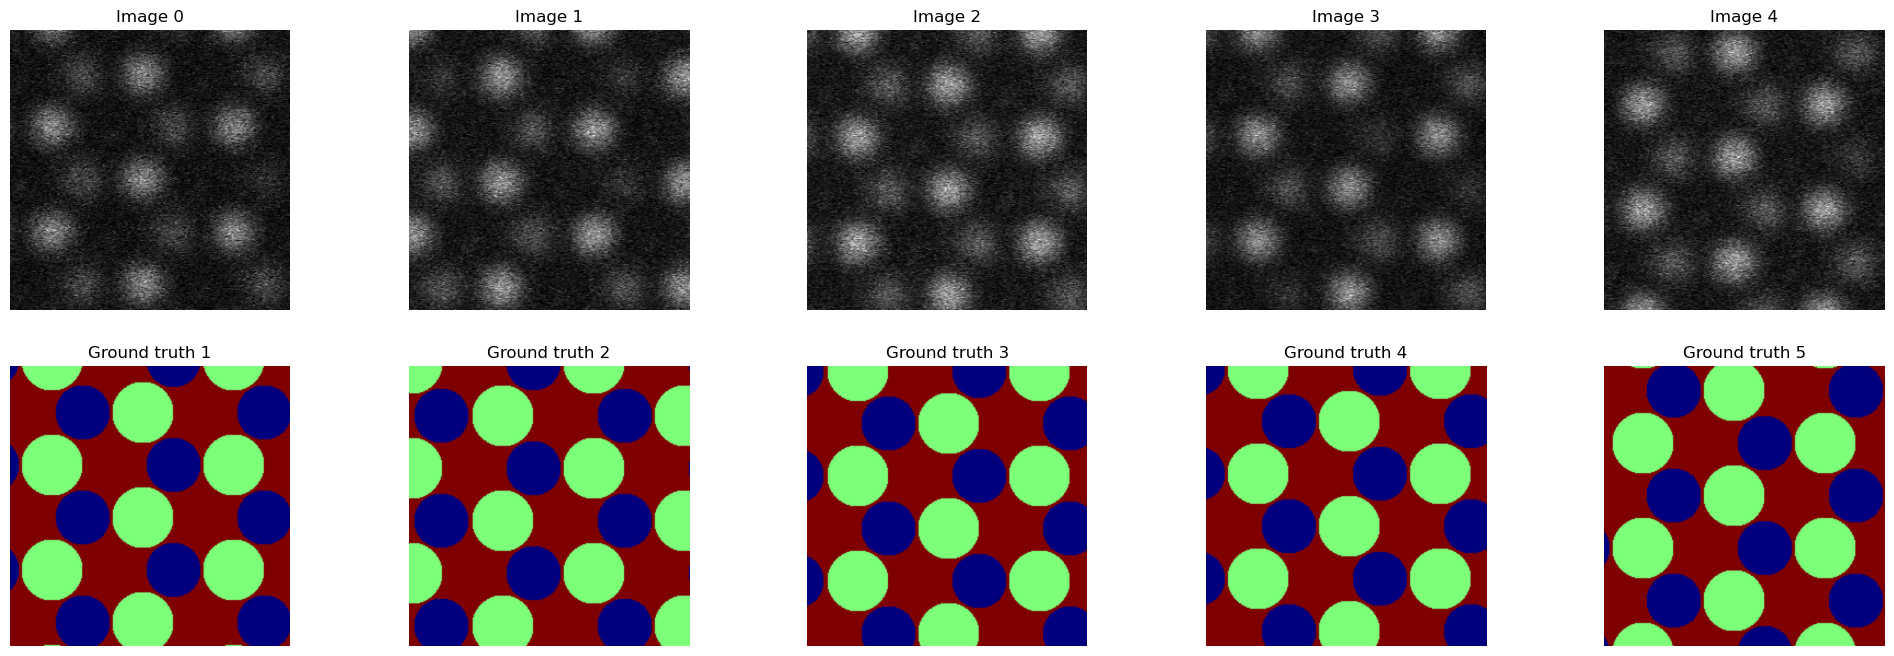

In [6]:
n = 5

n = n + 1
fig = plt.figure( figsize=(30, 8))
for i in range(1, n):   
    ax = fig.add_subplot(2, n, i)
    ax.imshow(images_all[i-1], cmap='gray')
    ax.set_axis_off()
    ax.set_title('Image ' + str(i-1) )
    ax.grid(alpha = 0.5)
    ax = fig.add_subplot(2, n, i+n)
    ax.set_axis_off()
    if labels_all.shape[1] == 1:
        ax.imshow(labels_all[i-1, 0], cmap='jet', interpolation='Gaussian')
    else:
        ax.imshow(labels_all[i-1], cmap='jet', interpolation='Gaussian')
    ax.set_title('Ground truth ' + str(i))
    ax.grid(alpha=0.75)
plt.savefig('../images/amostra_dataset_mos2_pre_noise.png', dpi=900, bbox_inches='tight')


In [7]:
# For a single class case, we still need to explicitly specify the single channel
labels_all = labels_all[..., None] if np.ndim(labels_all) == 3 else labels_all
# Number of channels in masked data (the training images have a single channel)
ch = labels_all.shape[-1]
# Define image distortion/noise parameters
zoom = 1.1 # zoom factor
poisson = [30, 40] # P noise range (scaled units)
gauss = [20, 100] # G noise range (scaled units)
blur = [1, 40] # Blurring range (scaled units)
contrast = [5, 14] # contrast range (< 10 is brighter, > 10 is darker)
salt_and_pepper = [1, 10] # min/max amount of salted/peppered pixels (scaled units)
# Run the augmentor
imaug = datatransform(
    n_channels=ch, dim_order_in='channel_last', dim_order_out='channel_first', 
    gauss_noise=gauss, poisson_noise=poisson, salt_and_pepper=salt_and_pepper,
    contrast=contrast, blur=blur, zoom=zoom, rotation=True,
    squeeze_channels=True, seed=42)
images_all, labels_all = imaug.run(images_all, labels_all)

print(images_all.shape, labels_all.shape)

(2000, 1, 256, 256) (2000, 1, 256, 256)


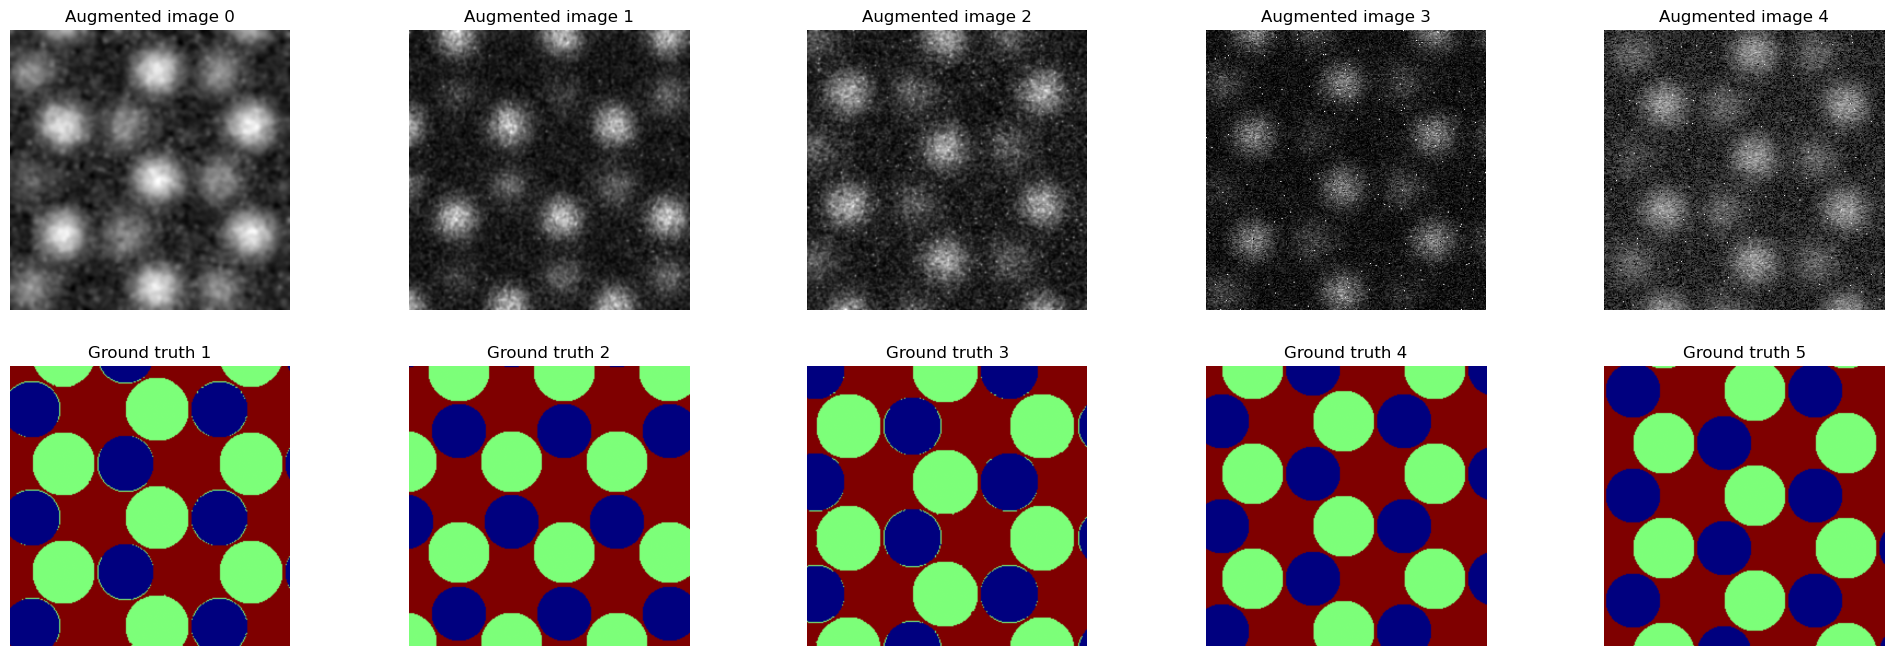

In [8]:
n = 5

n = n + 1
fig = plt.figure( figsize=(30, 8))
for i in range(1, n):   
    ax = fig.add_subplot(2, n, i)
    ax.imshow(images_all[i-1,0,:,:], cmap='gray')
    ax.set_axis_off()
    ax.set_title('Augmented image ' + str(i-1) )
    ax.grid(alpha = 0.5)
    ax = fig.add_subplot(2, n, i+n)
    ax.set_axis_off()
    if labels_all.shape[1] == 1:
        ax.imshow(labels_all[i-1, 0], cmap='jet', interpolation='Gaussian')
    else:
        ax.imshow(labels_all[i-1], cmap='jet', interpolation='Gaussian')
    ax.set_title('Ground truth ' + str(i))
    ax.grid(alpha=0.75)
plt.savefig('../images/amostra_dataset_mos2.png', dpi=900, bbox_inches='tight')


In [9]:
from sklearn.model_selection import train_test_split
images_all, images_test_all, labels_all, labels_test_all = train_test_split(
    images_all, labels_all, test_size=0.2, random_state=42)

In [10]:
np.savez('../mos2_dataset.npz', images= images_all, labels = labels_all)
np.savez('../mos2_test.npz', images_test= images_test_all, labels_test = labels_test_all)